# 2 Arms exploration

On this notebook we explore and extract the results when applying linUCB with a 0-1 rewards with different alphas 

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [13]:
def Multiple_Runs(Times, Data, Features, Reward, Alpha):
    Feat_Mult = {}
    Mark_Mult = {}
    Paths_Mult = {}
    Align_Mult = {}
    Features_Arms_Mult = {}
    for x in range(Times):
        Feat_Mult["Feat{0}_Mult".format(x)] = {}
        Mark_Mult["Mark{0}_Mult".format(x)] = {}
        Paths_Mult["Path{0}_Mult".format(x)] = {}
        Align_Mult["Alig{0}_Mult".format(x)] = {}
        Features_Arms_Mult["Feat{0}_Mult".format(x)] = {}
        
    Times_ArmsChosen_Mult = []
    
    Mean_Reward = []
    Mean_RewardArms = []

    for k in range(Times):
        Paths, Times_Aligned, Arms_Rewards, Aligned_Reward, UCB_Object, Times_ArmsChosen, Mark_dic, Features_dic = LinUCB_Algorithm(Data, Alpha, Features, Reward)
                   
        Mark_Mult["Mark{0}_Mult".format(k)] = Mark_dic
        Feat_Mult["Feat{0}_Mult".format(k)] = Features_dic
        Paths_Mult["Path{0}_Mult".format(k)] = Paths
        Align_Mult["Alig{0}_Mult".format(k)] = Aligned_Reward
            
        Mean_Reward.append(np.mean([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)]))
        Mean_RewardArms.append([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)])
        Times_ArmsChosen_Mult.append(Times_ArmsChosen)
        
    return Paths_Mult, Align_Mult, Mean_Reward, Mean_RewardArms, Mark_Mult, Feat_Mult, Times_ArmsChosen_Mult

## Exploration which ID to select

In [3]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

In [47]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64


In [48]:
Check_ABTestId(data_big3)

ID: 3350
	Total:  1381702
	NGU: 1237183
	Non-NGU: 144519
	Num Arms: 3
ID: 3301
	Total:  776402
	NGU: 743103
	Non-NGU: 33299
	Num Arms: 2
ID: 3331
	Total:  717633
	NGU: 670986
	Non-NGU: 46647
	Num Arms: 2
ID: 3292
	Total:  706119
	NGU: 627391
	Non-NGU: 78728
	Num Arms: 2
ID: 3346
	Total:  655856
	NGU: 550667
	Non-NGU: 105189
	Num Arms: 3
ID: 3307
	Total:  413295
	NGU: 390729
	Non-NGU: 22566
	Num Arms: 2

Unique A/B: [3292 3301 3307 3331 3346 3350]


### Define ID + features + dataset reduction 

In [62]:
Test_ID_big = 3301
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
print(DataDef.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
print("Before: ", DataDef.shape[1])
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
print("After: ", DataDef_cat.shape[1])
ats = DataDef_cat.head(int(DataDef.shape[0]/10)) #Es 7
print("Number of users:", ats.shape[0])
print("\nProportion of each arm:")
print(ats.ab_test_experience_id.value_counts(normalize = True))

(743103, 30)
Before:  30
After:  32
Number of users: 74310

Proportion of each arm:
0    0.500955
1    0.499045
Name: ab_test_experience_id, dtype: float64


In [63]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "ad_revenue_d1"
Arms = np.unique(ats.ab_test_experience_id).shape[0]
Alpha = 1
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 2
	Alpha: 1
	Num of Features: 6


In [64]:
Paths_d7p_A1_Big, Aligns_d7p_A1_Big, Mean_Reward_d7p_A1_Big, Mean_RewardArms_d7p_A1_Big, Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big, Times_ArmsChosen_d7p_A1_Big = Multiple_Runs(Times = 2, Data = ats, Features = Features, Reward = Reward, Alpha = Alpha)

100%|███████████████████████████████████████████████████████████████████████████| 74310/74310 [01:22<00:00, 899.48it/s]


In [65]:
Times_ArmsChosen_d7p_A1_Big

[[7306, 29848], [6301, 30693]]

In [66]:
np.mean(ats[Reward])

0.03500619231251443

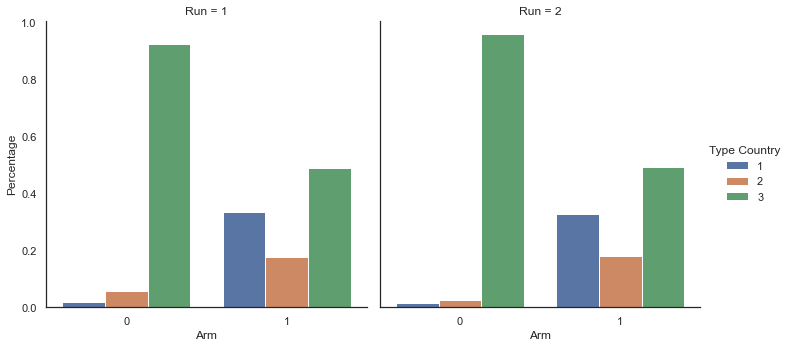

In [67]:
PlotFeaturesArm_2_Country(Feat_Mult_d7p_A1_Big)

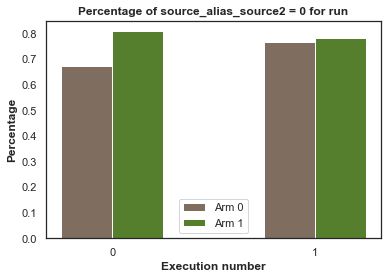

In [68]:
PlotFeaturesArm_2(Feat_Mult_d7p_A1_Big, Alpha, Reward = "source_alias_source2")

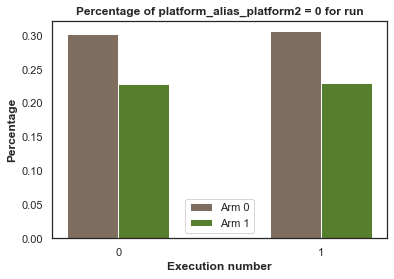

In [69]:
PlotFeaturesArm_2(Feat_Mult_d7p_A1_Big, Alpha, Reward = "platform_alias_platform2")

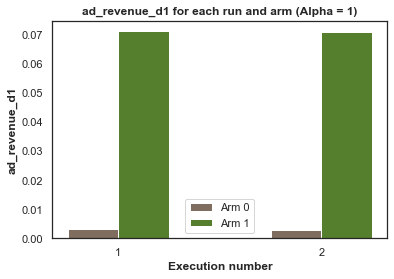

In [70]:
PerformanceArm2(Mean_RewardArms_d7p_A1_Big, Alpha, Reward)

0.0509731112200414
0.0467575059230234


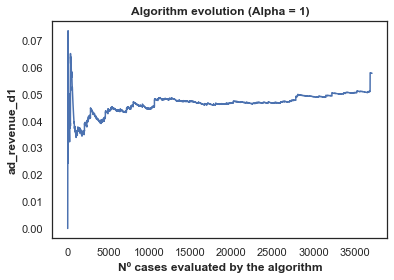

In [98]:
print(np.mean(Aligns_d7p_A1_Big["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A1_Big, 0, Reward, Alpha)

0.05254333573987822
0.053853840709196465


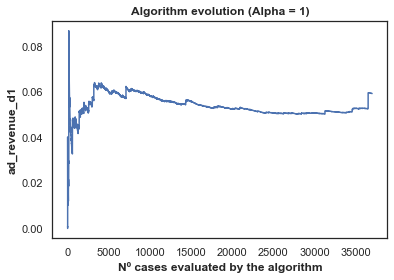

In [99]:
print(np.mean(Aligns_d7p_A1_Big["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A1_Big, 1, Reward, Alpha)

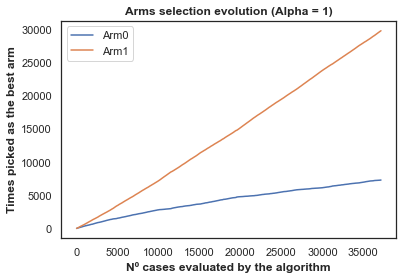

In [73]:
Plot_ArmsSelection(Paths_d7p_A1_Big, 0, Alpha)

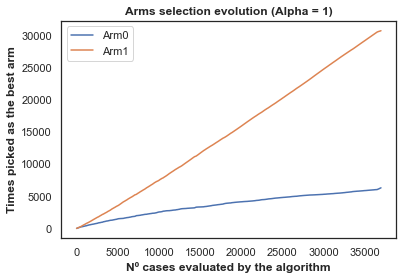

In [74]:
Plot_ArmsSelection(Paths_d7p_A1_Big, 1, Alpha)

Times each arm is chosen: [ 6803.5 30270.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 28.199423095726996
Proportion source_alias_source2 equals 0 for arm 1 is: 20.479594068242324


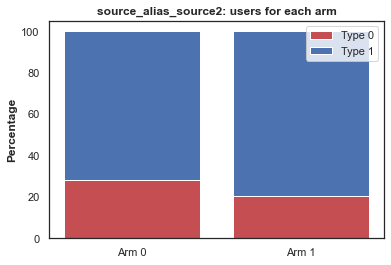

Proportion platform_alias_platform2 equals 0 for arm 0 is: 69.5570059646035
Proportion platform_alias_platform2 equals 0 for arm 1 is: 77.1330828801238


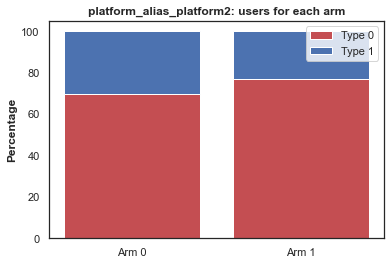

Proportion country for arm 0 is: [0.01583553 0.04220674 0.94195773]
Proportion country for arm 1 is: [0.33092941 0.17833578 0.49073481]


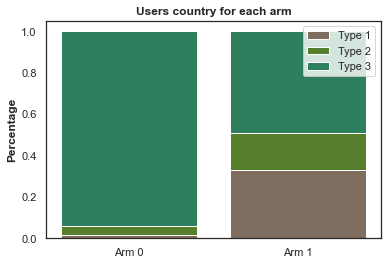

In [75]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d7p_A1_Big, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)
Plot1("platform_alias_platform2", Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)
Plot2_2arms(Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)

### Alpha = 5

In [76]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "ad_revenue_d1"
Arms = np.unique(ats.ab_test_experience_id).shape[0]
Alpha = 5
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 2
	Alpha: 5
	Num of Features: 6


In [77]:
Paths_d7p_A5_Big, Aligns_d7p_A5_Big, Mean_Reward_d7p_A5_Big, Mean_RewardArms_d7p_A5_Big, Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big, Times_ArmsChosen_d7p_A5_Big = Multiple_Runs(Times = 2, Data = ats, Features = Features, Reward = Reward, Alpha = Alpha)

100%|███████████████████████████████████████████████████████████████████████████| 74310/74310 [01:18<00:00, 944.58it/s]


In [78]:
np.mean(ats[Reward])

0.03500619231251443

In [79]:
Times_ArmsChosen_d7p_A5_Big

[[12442, 24623], [12250, 24792]]

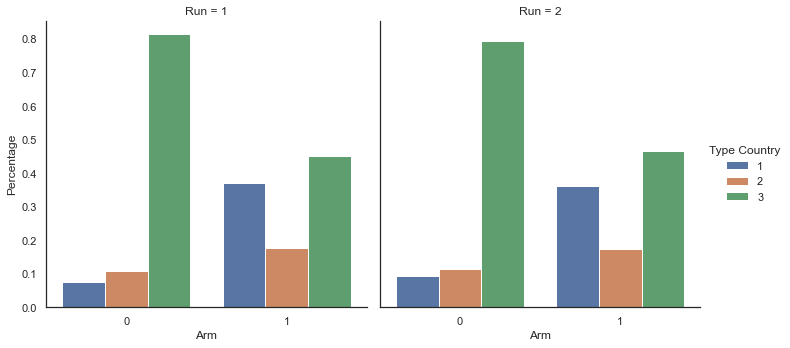

In [80]:
PlotFeaturesArm_2_Country(Feat_Mult_d7p_A5_Big)

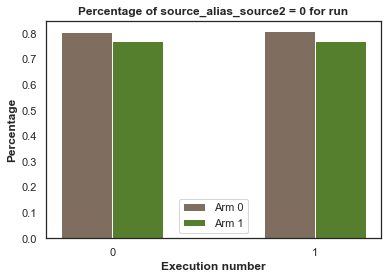

In [81]:
PlotFeaturesArm_2(Feat_Mult_d7p_A5_Big, Alpha, Reward = "source_alias_source2")

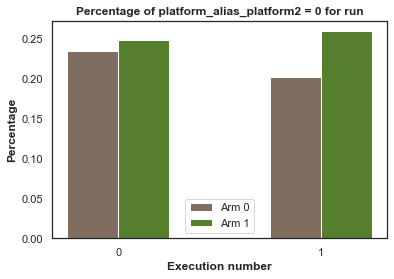

In [82]:
PlotFeaturesArm_2(Feat_Mult_d7p_A5_Big, Alpha, Reward = "platform_alias_platform2")

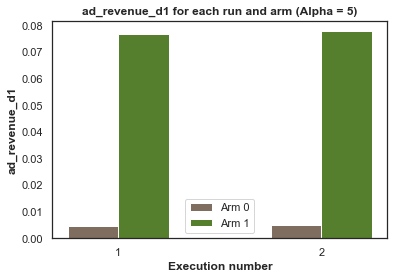

In [83]:
PerformanceArm2(Mean_RewardArms_d7p_A5_Big, Alpha, Reward)

0.05311377293007772
0.04431185469972328


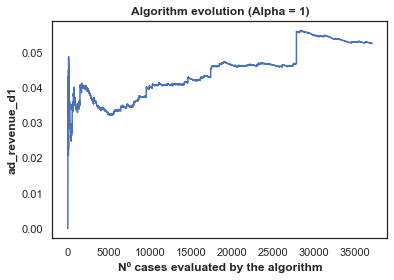

In [100]:
print(np.mean(Aligns_d7p_A5_Big["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A5_Big, 0, Reward, Alpha)

0.0532557267723628
0.04195159296875263


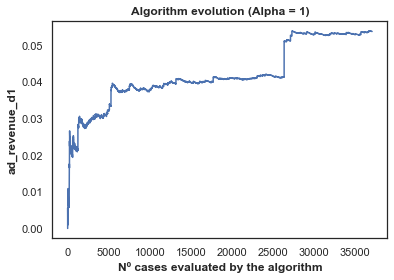

In [101]:
print(np.mean(Aligns_d7p_A5_Big["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A5_Big, 1, Reward, Alpha)

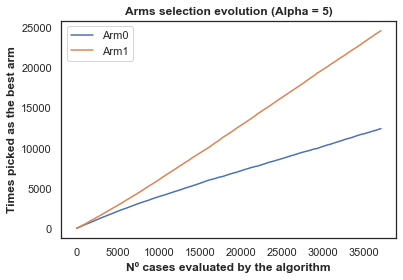

In [86]:
Plot_ArmsSelection(Paths_d7p_A5_Big, 0, Alpha)

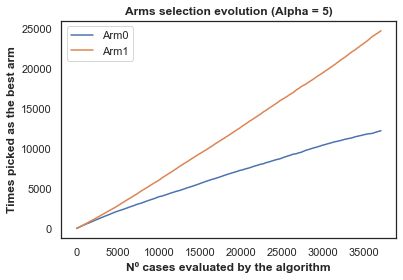

In [87]:
Plot_ArmsSelection(Paths_d7p_A5_Big, 1, Alpha)

Times each arm is chosen: [12346.  24707.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 19.306343182043097
Proportion source_alias_source2 equals 0 for arm 1 is: 23.080970642128914


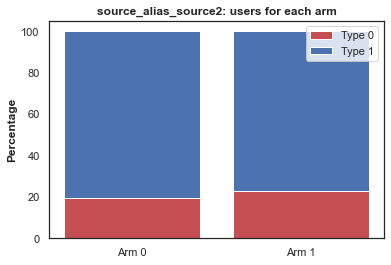

Proportion platform_alias_platform2 equals 0 for arm 0 is: 78.16965536061535
Proportion platform_alias_platform2 equals 0 for arm 1 is: 74.57132120834294


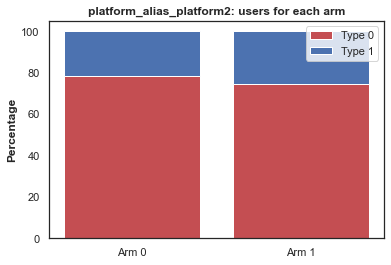

Proportion country for arm 0 is: [0.08438554 0.11111031 0.80450414]
Proportion country for arm 1 is: [0.36668278 0.17457329 0.45874394]


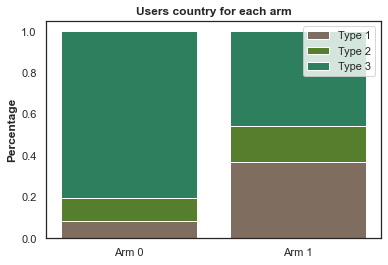

In [88]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d7p_A5_Big, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)
Plot1("platform_alias_platform2", Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)
Plot2_2arms(Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)

# 4 Arms

In [89]:
dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [90]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [91]:
Check_ABTestId(data_big2)

ID: 3495
	Total:  486295
	NGU: 324780
	Non-NGU: 161515
	Num Arms: 3
ID: 3552
	Total:  458911
	NGU: 441625
	Non-NGU: 17286
	Num Arms: 2
ID: 3582
	Total:  301515
	NGU: 289806
	Non-NGU: 11709
	Num Arms: 4
ID: 3473
	Total:  285731
	NGU: 277557
	Non-NGU: 8174
	Num Arms: 4
ID: 3457
	Total:  247844
	NGU: 240962
	Non-NGU: 6882
	Num Arms: 4
ID: 3454
	Total:  245962
	NGU: 239217
	Non-NGU: 6745
	Num Arms: 2
ID: 3565
	Total:  225935
	NGU: 190529
	Non-NGU: 35406
	Num Arms: 2
ID: 3420
	Total:  184148
	NGU: 175281
	Non-NGU: 8867
	Num Arms: 2
ID: 3507
	Total:  163803
	NGU: 134055
	Non-NGU: 29748
	Num Arms: 4
ID: 3526
	Total:  159849
	NGU: 154586
	Non-NGU: 5263
	Num Arms: 3

Unique A/B: [3420 3454 3457 3473 3495 3507 3526 3552 3565 3582]


### Define ID + features + dataset reduction 

In [121]:
Test_ID_big2 = 3582
NGU = 1
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print(data_big2[(data_big2.ab_test_id == Test_ID_big2)].shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
print("Before: ", DataDef2.shape[1])
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)
print("After: ", DataDef_cat2.shape[1])
ats2 = DataDef_cat2.head(int(DataDef_cat2.shape[0]/1)) #Es 2
print("Number of users:", ats2.shape[0])
print("\nProportion of each arm:")
print(ats2.ab_test_experience_id.value_counts(normalize = True))

(301515, 30)
Before:  30
After:  32
Number of users: 289806

Proportion of each arm:
2    0.250654
3    0.250216
1    0.249733
0    0.249398
Name: ab_test_experience_id, dtype: float64


In [122]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "ad_revenue_d1"
Arms = np.unique(ats2.ab_test_experience_id).shape[0]
Alpha = 1
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 4
	Alpha: 1
	Num of Features: 6


In [123]:
Paths_d1p_A1_Big2, Aligns_d1p_A1_Big2, Mean_Reward_d1p_A1_Big2, Mean_RewardArms_d1p_A1_Big2, Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2, Times_ArmsChosen_d1p_A1_Big2 = Multiple_Runs(Times = 2, Data = ats2, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 289806/289806 [12:19<00:00, 391.74it/s]


In [124]:
np.mean(ats2[Reward])

0.35095909089097804

In [125]:
Times_ArmsChosen_d1p_A1_Big2

[[8883, 16925, 21021, 25713], [19764, 14604, 16724, 21528]]

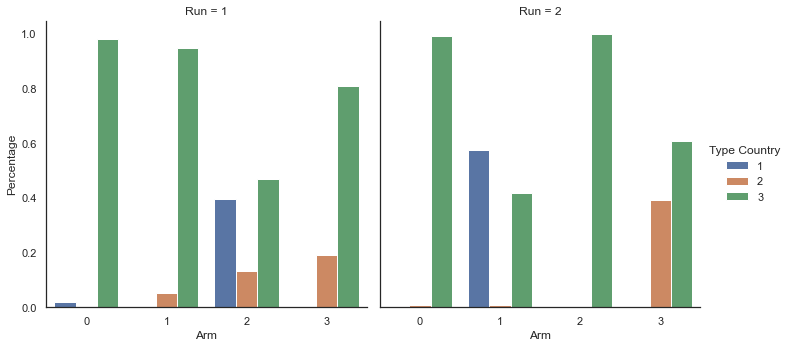

In [126]:
PlotFeaturesArm_4_Country(Feat_Mult_d1p_A1_Big2)

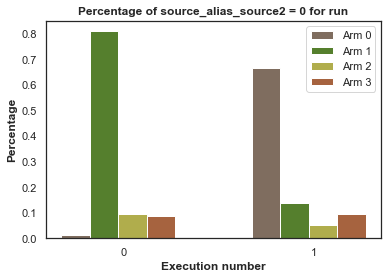

In [127]:
PlotFeaturesArm_4(Feat_Mult_d1p_A1_Big2, Alpha, Reward = "source_alias_source2")

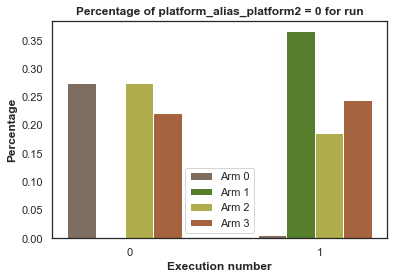

In [128]:
PlotFeaturesArm_4(Feat_Mult_d1p_A1_Big2, Alpha, Reward = "platform_alias_platform2")

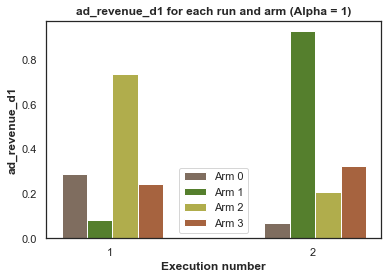

In [129]:
PerformanceArm4(Mean_RewardArms_d1p_A1_Big2, Alpha, Reward)

0.35333283725546943
0.3569684349390915


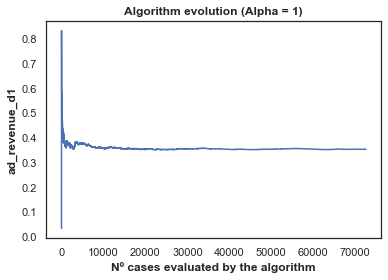

In [130]:
print(np.mean(Aligns_d1p_A1_Big2["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A1_Big2, 0, Reward, Alpha)

0.3493313554248367
0.34477261511094076


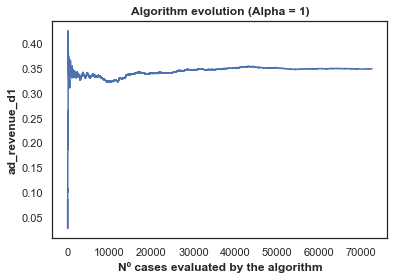

In [131]:
print(np.mean(Aligns_d1p_A1_Big2["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A1_Big2, 1, Reward, Alpha)

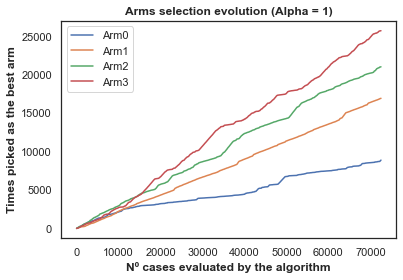

In [132]:
Plot_ArmsSelection(Paths_d1p_A1_Big2, 0, Alpha)

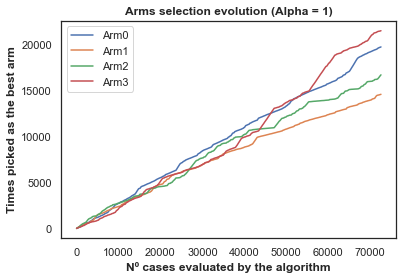

In [133]:
Plot_ArmsSelection(Paths_d1p_A1_Big2, 1, Alpha)

Times each arm is chosen: [14323.5 15764.5 18872.5 23620.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 65.93600986597737
Proportion source_alias_source2 equals 0 for arm 1 is: 52.558264755659565
Proportion source_alias_source2 equals 0 for arm 2 is: 92.58454402236521
Proportion source_alias_source2 equals 0 for arm 3 is: 90.96729320458881


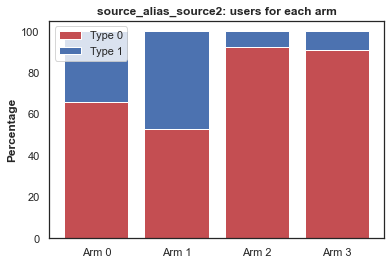

Proportion platform_alias_platform2 equals 0 for arm 0 is: 86.00383156709643
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.68855713769942
Proportion platform_alias_platform2 equals 0 for arm 2 is: 76.94236027422366
Proportion platform_alias_platform2 equals 0 for arm 3 is: 76.7059206071049


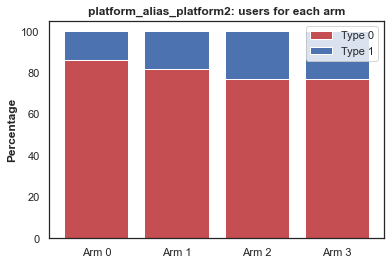

Proportion country for arm 0 is: [0.00905758 0.00452109 0.98642133]
Proportion country for arm 1 is: [0.28748124 0.03125817 0.68126059]
Proportion country for arm 2 is: [0.19913409 0.06734047 0.73352544]
Proportion country for arm 3 is: [1.08572283e-04 2.90883760e-01 7.09007668e-01]


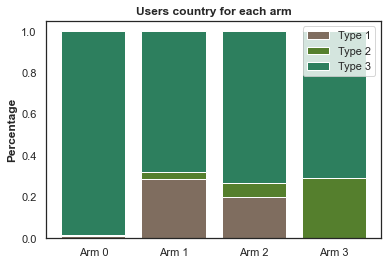

In [134]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d1p_A1_Big2, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)
Plot1("platform_alias_platform2", Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)
Plot2_2arms(Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)

### Alpha = 5

In [135]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "ad_revenue_d1"
Arms = np.unique(ats2.ab_test_experience_id).shape[0]
Alpha = 5
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 4
	Alpha: 5
	Num of Features: 6


In [136]:
Paths_d1p_A5_Big2, Aligns_d1p_A5_Big2, Mean_Reward_d1p_A5_Big2, Mean_RewardArms_d1p_A5_Big2, Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2, Times_ArmsChosen_d1p_A5_Big2 = Multiple_Runs(Times = 2, Data = ats2, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 289806/289806 [11:40<00:00, 413.87it/s]


In [150]:
np.mean(ats2[Reward])

0.35095909089097804

In [138]:
Times_ArmsChosen_d1p_A5_Big2

[[14526, 20007, 17742, 19991], [18331, 17039, 17980, 19213]]

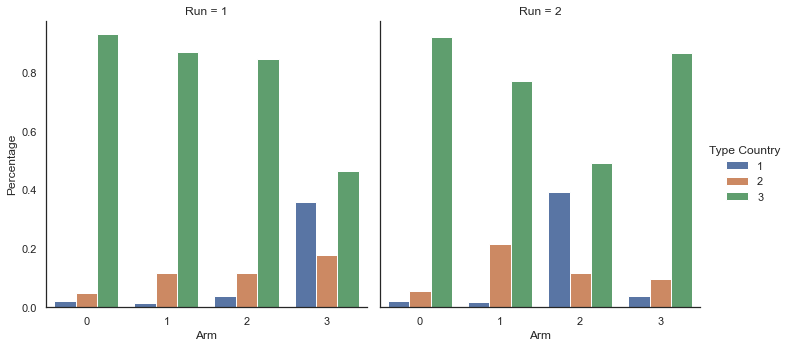

In [139]:
PlotFeaturesArm_4_Country(Feat_Mult_d1p_A5_Big2)

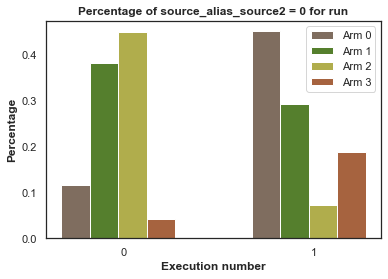

In [140]:
PlotFeaturesArm_4(Feat_Mult_d1p_A5_Big2, Alpha, Reward = "source_alias_source2")

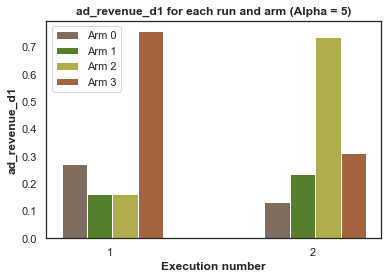

In [141]:
PerformanceArm4(Mean_RewardArms_d1p_A5_Big2, Alpha, Reward)

0.3499563939552772
0.3500355700269065


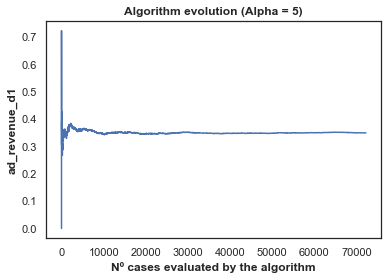

In [142]:
print(np.mean(Aligns_d1p_A5_Big2["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 0, Reward, Alpha)

In [147]:
Reward

'ad_revenue_d1'

In [146]:
np.mean(ats[Reward])

0.03500619231251443

0.3553609825390486
0.35499249907098407


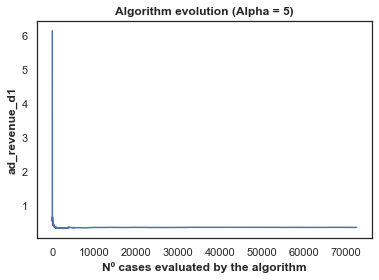

In [143]:
print(np.mean(Aligns_d1p_A5_Big2["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 1, Reward, Alpha)

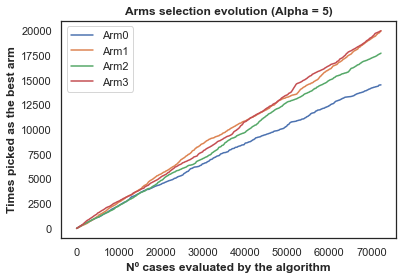

In [144]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 0, Alpha)

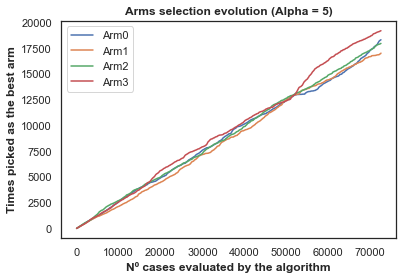

In [148]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 1, Alpha)

Times each arm is chosen: [16428.5 18523.  17861.  19602. ]
Proportion source_alias_source2 equals 0 for arm 0 is: 71.62879903997566
Proportion source_alias_source2 equals 0 for arm 1 is: 66.24960745137183
Proportion source_alias_source2 equals 0 for arm 2 is: 73.95891737976038
Proportion source_alias_source2 equals 0 for arm 3 is: 88.42522812520147


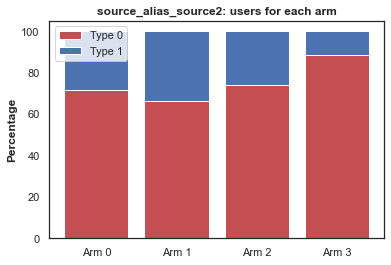

Proportion platform_alias_platform2 equals 0 for arm 0 is: 82.99256976467947
Proportion platform_alias_platform2 equals 0 for arm 1 is: 88.01698027978624
Proportion platform_alias_platform2 equals 0 for arm 2 is: 85.40500072799423
Proportion platform_alias_platform2 equals 0 for arm 3 is: 66.70380500473014


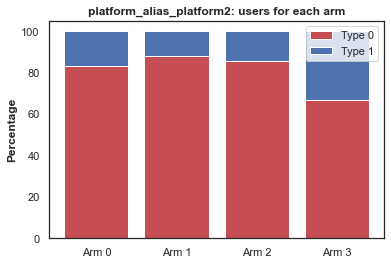

Proportion country for arm 0 is: [0.02084192 0.05351671 0.92564137]
Proportion country for arm 1 is: [0.01641124 0.16484942 0.81873934]
Proportion country for arm 2 is: [0.21528532 0.11729674 0.66741794]
Proportion country for arm 3 is: [0.19862247 0.13752275 0.66385478]


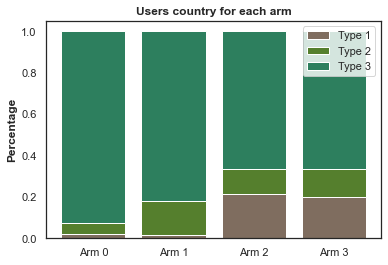

In [149]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d1p_A5_Big2, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot1("platform_alias_platform2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot2_2arms(Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)

### Alpha = 3

In [151]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "ad_revenue_d1"
Arms = np.unique(ats2.ab_test_experience_id).shape[0]
Alpha = 3
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 4
	Alpha: 3
	Num of Features: 6


In [152]:
Paths_d1p_A5_Big2, Aligns_d1p_A5_Big2, Mean_Reward_d1p_A5_Big2, Mean_RewardArms_d1p_A5_Big2, Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2, Times_ArmsChosen_d1p_A5_Big2 = Multiple_Runs(Times = 2, Data = ats2.head(70000), Features = Features, Reward = Reward, Alpha = Alpha)

100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [01:04<00:00, 1092.88it/s]


In [153]:
np.mean(ats2[Reward])

0.35095909089097804

In [154]:
Times_ArmsChosen_d1p_A5_Big2

[[3684, 4884, 4330, 4712], [3830, 4384, 5026, 4197]]

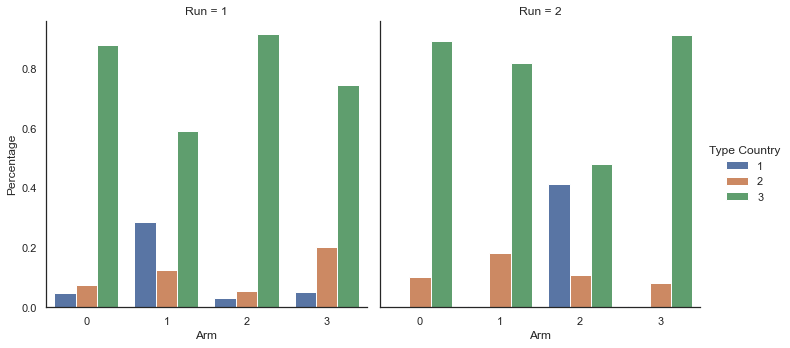

In [155]:
PlotFeaturesArm_4_Country(Feat_Mult_d1p_A5_Big2)

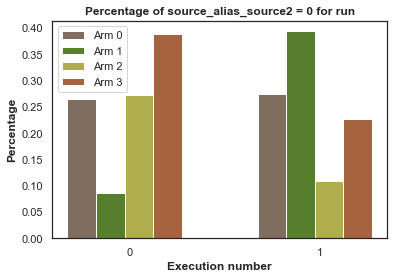

In [156]:
PlotFeaturesArm_4(Feat_Mult_d1p_A5_Big2, Alpha, Reward = "source_alias_source2")

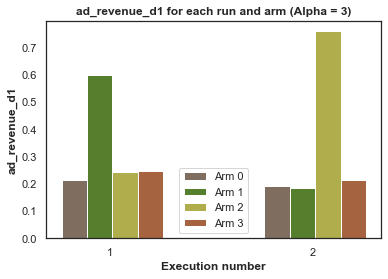

In [157]:
PerformanceArm4(Mean_RewardArms_d1p_A5_Big2, Alpha, Reward)

0.33397603512907376
0.33133817079305466


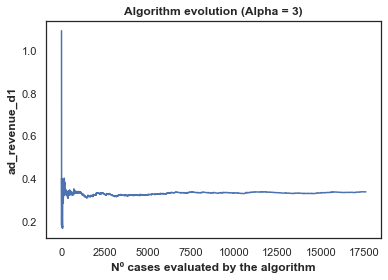

In [158]:
print(np.mean(Aligns_d1p_A5_Big2["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 0, Reward, Alpha)

0.3608098209649324
0.3606559355563233


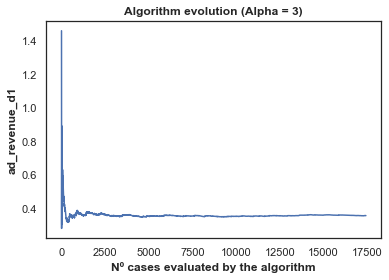

In [159]:
print(np.mean(Aligns_d1p_A5_Big2["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 1, Reward, Alpha)

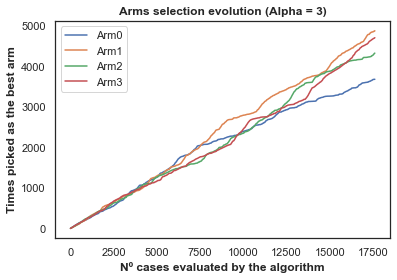

In [160]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 0, Alpha)

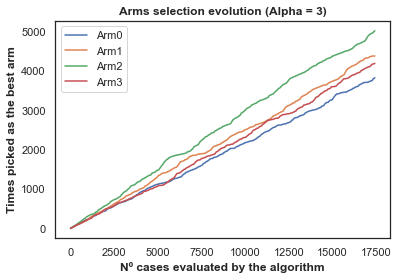

In [161]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 1, Alpha)

Times each arm is chosen: [3757.  4634.  4678.  4454.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 73.01214625483799
Proportion source_alias_source2 equals 0 for arm 1 is: 75.97776797504217
Proportion source_alias_source2 equals 0 for arm 2 is: 80.94650103605328
Proportion source_alias_source2 equals 0 for arm 3 is: 69.23323483423883


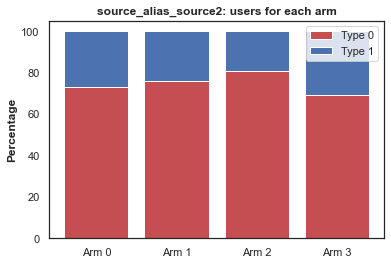

Proportion platform_alias_platform2 equals 0 for arm 0 is: 83.99173618710887
Proportion platform_alias_platform2 equals 0 for arm 1 is: 80.96939523335674
Proportion platform_alias_platform2 equals 0 for arm 2 is: 75.33309888533769
Proportion platform_alias_platform2 equals 0 for arm 3 is: 85.57840765350713


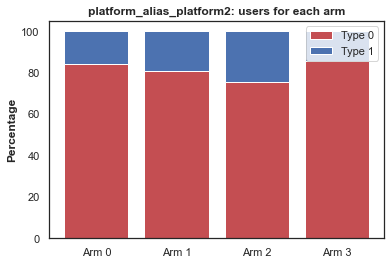

Proportion country for arm 0 is: [0.02636945 0.08770744 0.8859231 ]
Proportion country for arm 1 is: [0.14390425 0.15290139 0.70319436]
Proportion country for arm 2 is: [0.22192868 0.08103736 0.69703396]
Proportion country for arm 3 is: [0.02904905 0.14197751 0.82897343]


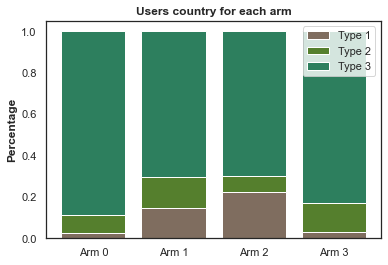

In [162]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d1p_A5_Big2, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot1("platform_alias_platform2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot2_2arms(Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)